## Match Analysis


In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [219]:
matches = pd.read_csv("matches.csv" , index_col = "id")

In [233]:
matches = matches.iloc[:,:-3]

In [221]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Selecting only KKR VS RCB Matches

In [222]:
DM=matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Royal Challengers Bangalore'))]

In [223]:
DM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens
45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium
60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens
134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead


In [224]:
DM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

### HEAD TO HEAD PERFORMANCE

Text(0.5, 1.0, 'DC VS MI - head to head')

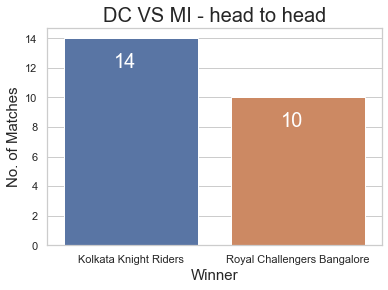

In [311]:
sns.countplot(DM["winner"])
plt.text(-0.1,12,str(DM['winner'].value_counts()['Kolkata Knight Riders']),size=20,color='white')
plt.text(0.9,8,str(DM['winner'].value_counts()['Royal Challengers Bangalore']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('DC VS MI - head to head',fontsize = 20)

### Winning Percentage 

In [226]:
Winning_Percentage = DM['winner'].value_counts()/len(DM['winner'])

In [227]:
print("KKR winning percentage against RCB(overall) : {}".format(round(Winning_Percentage[0]*100 , 2)))
print("RCB winning percentage against RCB(overall) : {}".format(round(Winning_Percentage[1]*100 , 2)))

KKR winning percentage against RCB(overall) : 58.33
RCB winning percentage against RCB(overall) : 41.67


### Match Records Analysis

In [228]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [229]:
performance("Kolkata Knight Riders",DM)

Number of times given team win while defending : 7
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  50.0
Average wickets by which a given team wins while chasing :  5.0


In [230]:
performance('Royal Challengers Bangalore',DM)

Number of times given team win while defending : 1
Number of times given team win while chasing   : 9

Average runs by which a given team wins while defending  :  10.0
Average wickets by which a given team wins while chasing :  6.0


 Above Performance analysis give a breif overview of dominance of KKR over RCB. But we can also see a clear chasing dominance of RCB when they win matches

### Toss Analysis


In [242]:
DM.groupby(['toss_winner',"toss_decision"]).count().iloc[:,1]

toss_winner                  toss_decision
Kolkata Knight Riders        bat               3
                             field             8
Royal Challengers Bangalore  field            13
Name: city, dtype: int64

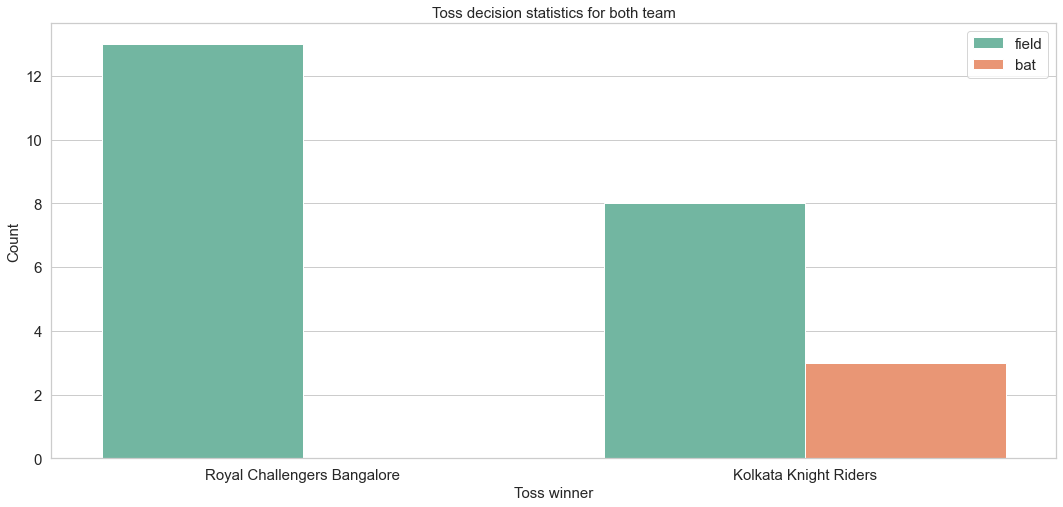

In [245]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(DM['toss_winner'],palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

From above analysis of toss , we can clearly see that RCB mostly prefered to chase the score , we have seen this earlier also that their winning trend was great while chasing against KKR. So we can predict that RCB is most likely to chase today also if they win the toss.(considering the analytical trend)

From KKR point of view we can see that they have also loved chasing the score but their winning percent while defending the score is also good. But going with the analysis we can predict that they are also more likely to go for chase today if won the toss.

Conclusion : We know that according to present trend in 2020 IPL teams are preferring to Bat first specially in flat pitches and smaller ground like Sharjah but going with the analysis we predict that toss winning team will go for Bowl first.  

In [307]:
DM.groupby(['toss_winner',"toss_decision"])["winner"].value_counts()

toss_winner                  toss_decision  winner                     
Kolkata Knight Riders        bat            Kolkata Knight Riders          2
                                            Royal Challengers Bangalore    1
                             field          Kolkata Knight Riders          7
                                            Royal Challengers Bangalore    1
Royal Challengers Bangalore  field          Royal Challengers Bangalore    8
                                            Kolkata Knight Riders          5
Name: winner, dtype: int64

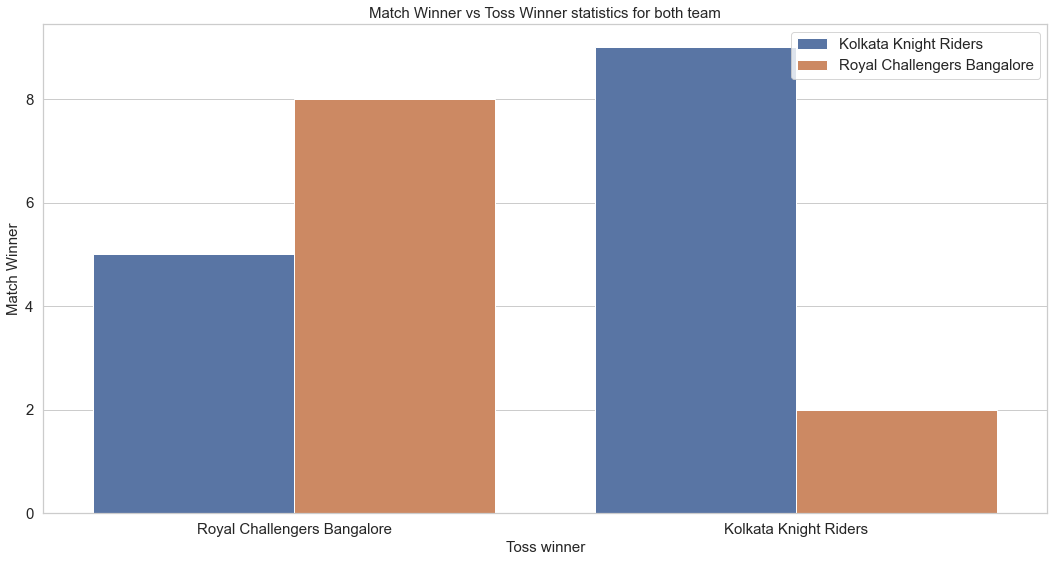

In [331]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DM['toss_winner'],hue=DM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

### Recent Year Performance Analysis

In [318]:
cond1 = DM["season"] == 2017
cond2 = DM["season"] == 2018
cond3 = DM["season"] == 2019
final = DM[cond1 | cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens
45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium
7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens
7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium
11153,2019,Bengaluru,05/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium
11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens


In [338]:
player = pd.DataFrame(final.player_of_match.value_counts())
player

,player_of_match
SP Narine,2
AD Russell,1
CA Lynn,1
NM Coulter-Nile,1
V Kohli,1


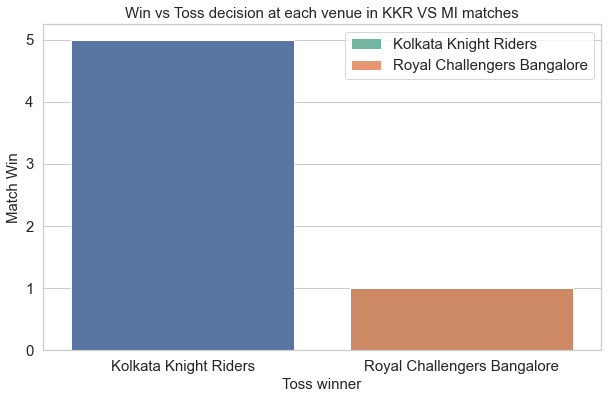

In [333]:
plt.figure(figsize = (10,6))
sns.countplot(final['toss_decision'],palette='Set2',hue=final['winner'])
sns.countplot(final['winner'])
plt.title('Win vs Toss decision at each venue in KKR VS MI matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Win',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

From the above analysis we can predict that KKR has higher chances of winning this matches considering their overall and recent records.

But as we all know that IPL 2020 is not in India so their are many other factors which will affect the analysis but based on our analysis we predict that KKR has higher chances if they bat second.